**Instituto Tecnológico y de Estudios Superiores de Monterrey**
1. Cecilia Acevedo Rodríguez - A01793953
2. Francisco Xavier Bastidas Moreno - A01794188
3. Ricardo Mar Cupido - A01795394
4. Edgar Gerardo Rojas Medina - A00840712

## **Parte 1.- Librerias**

In [1]:
#importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
import pandas as pd
#Importamos NearestNeighbors
from sklearn.neighbors import NearestNeighbors
#Importamos RMSe
from sklearn.metrics import mean_squared_error
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader

from surprise.model_selection import train_test_split



## **Parte 2.- Carga de datos**

In [2]:
#Nos traemos los datos del repositorio de github

df = pd.read_csv('https://raw.githubusercontent.com/MengtingWan/marketBias/master/data/df_electronics.csv')


## **Parte 3.- Exploración de datos**

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [4]:
#Observamos las columnas del dataset
df.columns

Index(['item_id', 'user_id', 'rating', 'timestamp', 'model_attr', 'category',
       'brand', 'year', 'user_attr', 'split'],
      dtype='object')

In [5]:
#Obtenemos los tipos de datos de las columnas
df.dtypes

item_id         int64
user_id         int64
rating        float64
timestamp      object
model_attr     object
category       object
brand          object
year            int64
user_attr      object
split           int64
dtype: object

In [6]:
#Primeos 10 registros
df.head(10)

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
5,0,5,2.0,1999-07-12,Female,Portable Audio & Video,NaN,1999,NaN,0
6,0,6,5.0,1999-07-13,Female,Portable Audio & Video,NaN,1999,NaN,0
7,0,7,2.0,1999-07-13,Female,Portable Audio & Video,NaN,1999,NaN,0
8,0,8,4.0,1999-07-16,Female,Portable Audio & Video,NaN,1999,NaN,0
9,0,9,5.0,1999-08-20,Female,Portable Audio & Video,NaN,1999,NaN,0


In [7]:
df.describe()

,item_id,user_id,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.183588e+03,5.605127e+05,4.051482e+00,2.012938e+03,1.747587e-01
std,2.525346e+03,3.342374e+05,1.379732e+00,2.643513e+00,5.506810e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.999000e+03,0.000000e+00
25%,2.018000e+03,2.697482e+05,4.000000e+00,2.012000e+03,0.000000e+00
50%,3.930000e+03,5.518920e+05,5.000000e+00,2.014000e+03,0.000000e+00
75%,6.289000e+03,8.474858e+05,5.000000e+00,2.015000e+03,0.000000e+00
max,9.559000e+03,1.157632e+06,5.000000e+00,2.018000e+03,2.000000e+00


In [8]:
#IMprimimos la cantidad de registros
df.shape

(1292954, 10)

In [9]:
#Extraemos las columnas y la cantidad de registros diferentes que tiene cada una
df.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              50
year               20
user_attr           2
split               3
dtype: int64

In [10]:
#contamos la cantidad de registros que tiene cada columna
df.count()

item_id       1292954
user_id       1292954
rating        1292954
timestamp     1292954
model_attr    1292954
category      1292954
brand          331120
year          1292954
user_attr      174124
split         1292954
dtype: int64

In [11]:
#Contamos la cantidad de resgistros nulos
print(df.isna().sum())

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand          961834
year                0
user_attr     1118830
split               0
dtype: int64


In [12]:
#Cantidad de usuarios unicos
df['user_id'].nunique()

1157633

In [13]:
#Buscamos el promedio de ratings
df['rating'].mean()

4.051482109959055

In [14]:
#Promedio de ratings por item y cantidad de ratings
promedio_df = df.groupby('item_id')['rating'].agg(['mean', 'count']).sort_values(by='mean', ascending=True)
promedio_df.head(10)

,mean,count
item_id,,
9559,1.000000,1
7432,1.000000,6
8770,1.000000,5
7182,1.000000,5
628,1.000000,6
2750,1.000000,5
1476,1.000000,8
489,1.111111,9
866,1.136364,22


In [15]:
#Articulos con el promedio de ratings mas alto
promedio_df.sort_values(by='mean', ascending=False).head(10)

,mean,count
item_id,,
2650,5.0,10
9075,5.0,7
2789,5.0,27
5823,5.0,7
9083,5.0,5
4928,5.0,5
3275,5.0,5
9026,5.0,12
6795,5.0,5


In [16]:
#Articulos con el promedio de ratings mas bajo
promedio_df.sort_values(by='mean', ascending=True).head(10)

,mean,count
item_id,,
9559,1.000000,1
7432,1.000000,6
8770,1.000000,5
7182,1.000000,5
628,1.000000,6
2750,1.000000,5
1476,1.000000,8
489,1.111111,9
866,1.136364,22


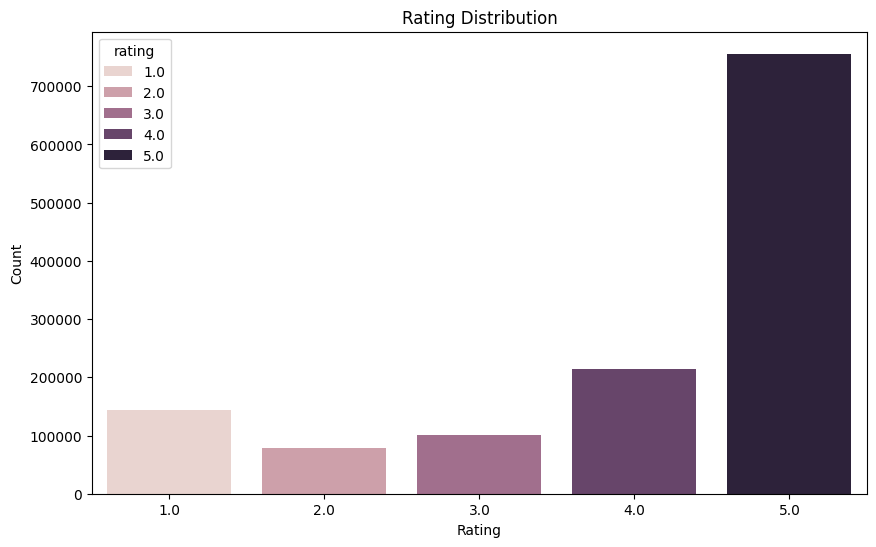

In [17]:
#Imprimos la cantidad de valores de rating graficados en orden ascendente
plt.figure(figsize=(10,6))
sns.countplot(x='rating', data=df, order = df['rating'].value_counts().sort_index().index, hue='rating')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

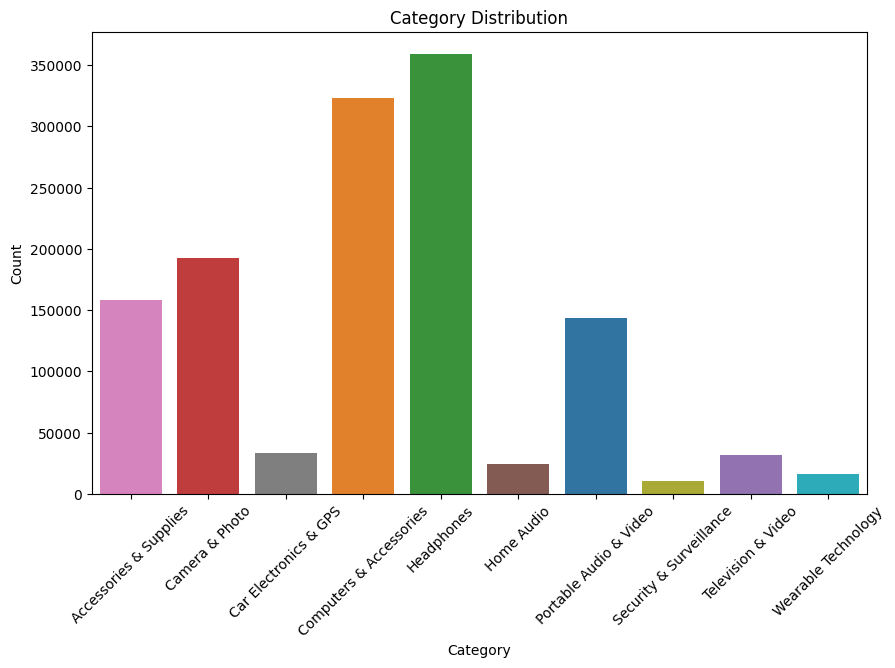

In [18]:
#Imprimos la cantidad de valores de category graficados en orden ascendente
plt.figure(figsize=(10,6))
sns.countplot(x='category', data=df, order = df['category'].value_counts().sort_index().index, hue='category')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Count')

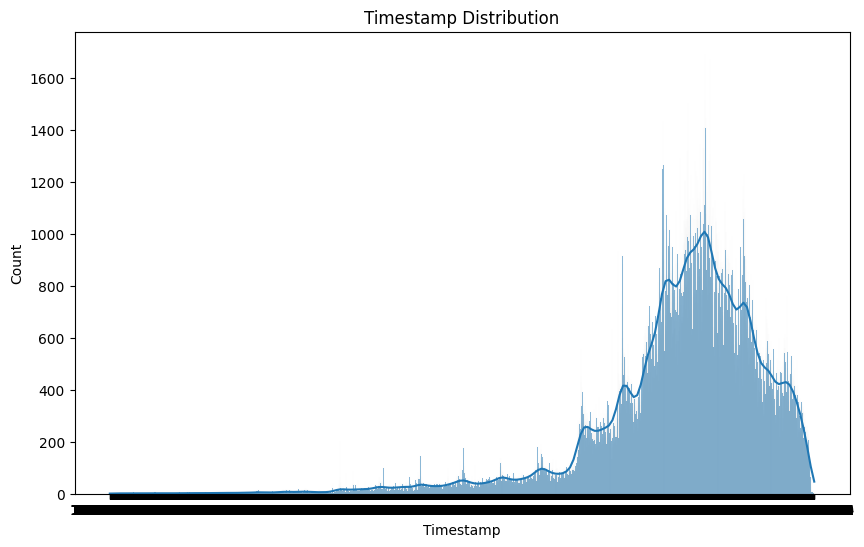

In [19]:
#Timestamp distribution
plt.figure(figsize=(10,6))  
sns.histplot(df['timestamp'], kde=True)
plt.title('Timestamp Distribution')
plt.xlabel('Timestamp')
plt.ylabel('Count')

In [20]:
#Contamos la cantidad de ratings que tiene cada usuario
user_rating_count = df.groupby(by='user_id')['rating'].count().sort_values(ascending=False)
user_rating_count.head(10)


user_id
142967    41
30661     38
89185     37
46878     34
80476     34
7605      32
18111     32
22606     32
247264    32
16528     31
Name: rating, dtype: int64

In [21]:
user_rating_count.describe()

count    1.157633e+06
mean     1.116895e+00
std      4.713194e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      4.100000e+01
Name: rating, dtype: float64

## **Parte 4.- Preparación de datos**

In [22]:
#Seleccionamos los campos que vamos a utilizar
new_df = df[['user_id', 'item_id', 'rating']]
df.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


## **Parte 5.- Modelado**

In [23]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df,reader)

In [24]:

train_x, test_x = train_test_split(data, test_size=0.3,random_state=10)

In [25]:
#{'k': 40, 'sim_options': {'name': 'pearson_baseline', 'min_support': 10, 'user_based': False, 'shrinkage': 0, 'k': 40, 'min_k': 1, 'random_state': 10, 'verbose': False, 'skip_train': False}}
algorith = KNNWithMeans(k=40, sim_options={'name': 'pearson_baseline', 'min_support': 10, 'user_based': False, 'shrinkage': 0, 'k': 40, 'min_k': 1, 'random_state': 10, 'verbose': False, 'skip_train': False})
algorith.fit(train_x)

predictions = algorith.test(test_x)

accuracy.rmse(predictions)

accuracy.mae(predictions)

accuracy.mse(predictions)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.3749
MAE:  1.1003
MSE: 1.8903


1.8902826218342188

In [26]:
#Funcion para obtener los items recomendados
def predict_item(item_id):
    item_inner_id = algorith.trainset.to_inner_iid(item_id)
    item_neighbors = algorith.get_neighbors(item_inner_id, k=10)
    neighbors = (algorith.trainset.to_raw_iid(inner_id) for inner_id in item_neighbors)
    return neighbors

In [27]:
#Obtenemos los items recomendados
items = predict_item(8533)
for item in items:
    print("Product ID: ", item)

Product ID:  3617
Product ID:  7770
Product ID:  3728
Product ID:  2957
Product ID:  4652
Product ID:  4183
Product ID:  5535
Product ID:  6210
Product ID:  6174
Product ID:  7780
